# Adult Income Dataset

In [ ]:
## Data Analysis and Pre-processing

### Import necessary libraries.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%autocall 2
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report

Automatic calling is: Full


There are few things to consider before starting to work.First,the dataset is already splitted to train and test for model building operations.Secondly,this dataset contains data suited for classification operations.

In [5]:
df_train = pd.read_csv("/content/drive/My Drive/DataAnalysis/AdultIncome/adult.data",sep=',',names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","<=50K"],na_values=[" ? ","? "," ?"],na_filter=True)
df_test = pd.read_csv("/content/drive/My Drive/DataAnalysis/AdultIncome/adult.test",sep=',',names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","<=50K"],na_values=[" ? ","? "," ?"],na_filter=True)
df = df_train.append(df_test)
df["<=50K"].replace(regex=True,inplace=True,to_replace=r'\.',value=r'')

Let's check what we have imported.

In [6]:
df.head(-1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


### Information regarding on the dataset

In [7]:
df.shape

(48842, 15)

There is a large amount of data.We are going to make a binary classification.We will try to investigate whether an individual will earn more than 50 K or not regarding to the information given to us.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  <=50K           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum() 

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
<=50K                0
dtype: int64

Well values are matching so we can continue to decide what to do on the missing values.

In [11]:
for column in df:
  print(column," : ",df[column].unique())
  print("------------------------------------------------------------------------------------------------------------------")

age  :  [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
------------------------------------------------------------------------------------------------------------------
workclass  :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
------------------------------------------------------------------------------------------------------------------
fnlwgt  :  [ 77516  83311 215646 ... 173449  89686 350977]
------------------------------------------------------------------------------------------------------------------
education  :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------------

### Exploratory Data Analysis - (EDA)

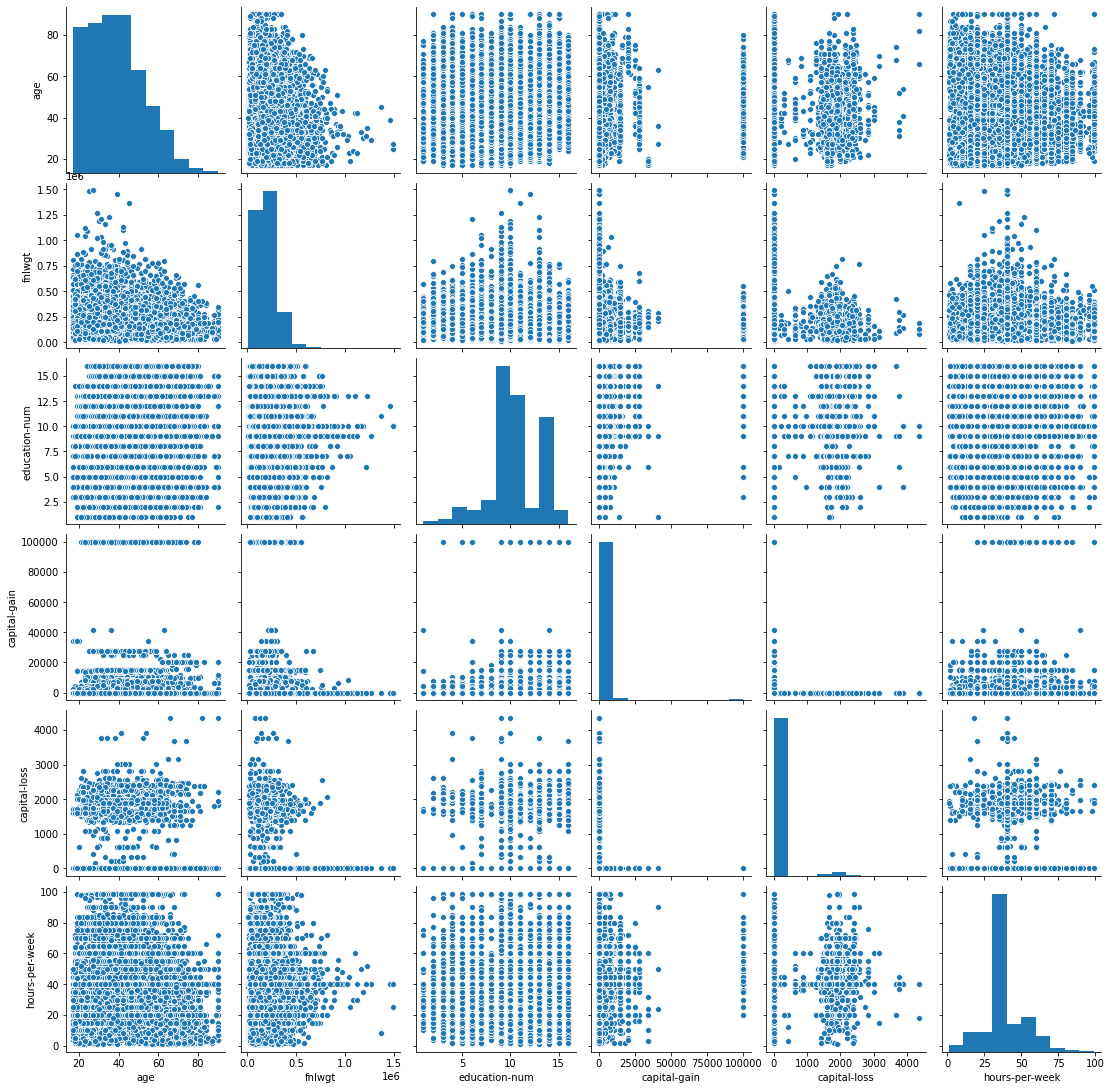

In [12]:
sns.pairplot(df)

#### Age Distribution

<BarContainer object of 74 artists>

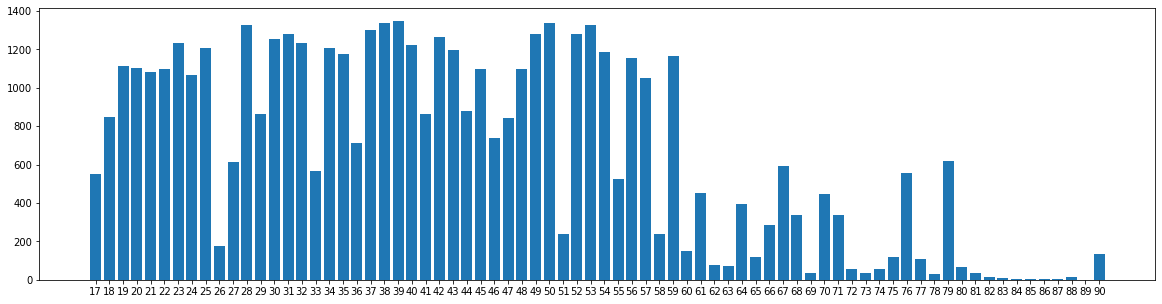

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(df.age.unique())     
plt.bar(df.age.unique(),df.age.value_counts())

It is more common to observe people aged 60 and lower in this dataset.Despite the fact that some ages between 17 to 60 seems low in the dataset,dramatic decrease occurs after age 60.

* Age is right skewed.
* Ranges from 17 to 90 having 89 as the only missing age in the range.
* 59 is the break point for the major decrease in the age.

#### Education 

<BarContainer object of 16 artists>

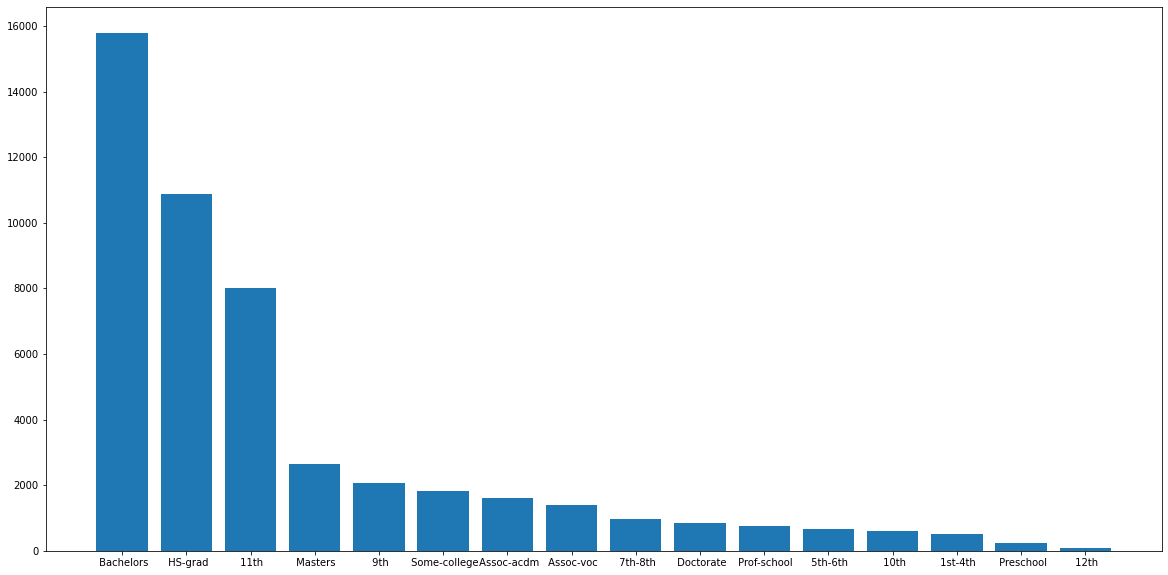

In [14]:
plt.figure(figsize=(20,10))
plt.bar(df.education.unique(),df.education.value_counts())     

* Bachelors is the most common education degree in the dataset followed by HS-grad and 11th.
* It can be observed that Masters is also the 4th most frequent education class label and Doctorate is one of the lowest frequent class label in the dataset.
* Some assumptions can be made:
  * People tends to finish the high school;HS-Grad is the second frequent class and 12th grade is the least freq. class label.  

#### Marital Status 

<BarContainer object of 7 artists>

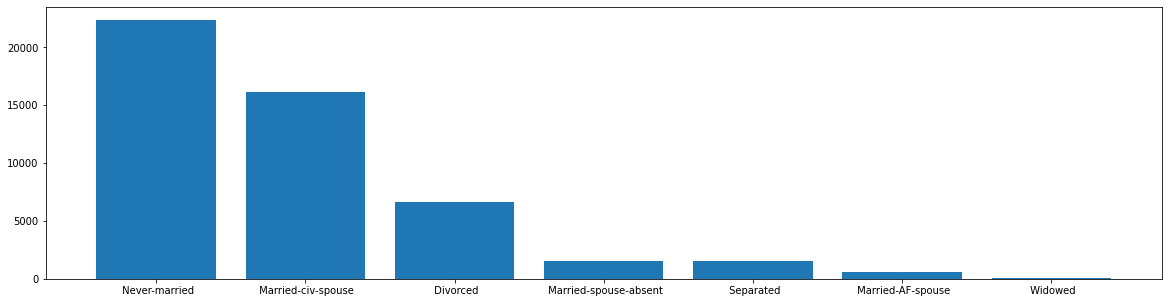

In [15]:
plt.figure(figsize=(20,5))
plt.bar(df["marital-status"].unique(),df["marital-status"].value_counts())     

Despite the fact that it seems dataset contains people that is never married,this is due to the fact that young people takes a great amount of part in the dataset.

<BarContainer object of 7 artists>

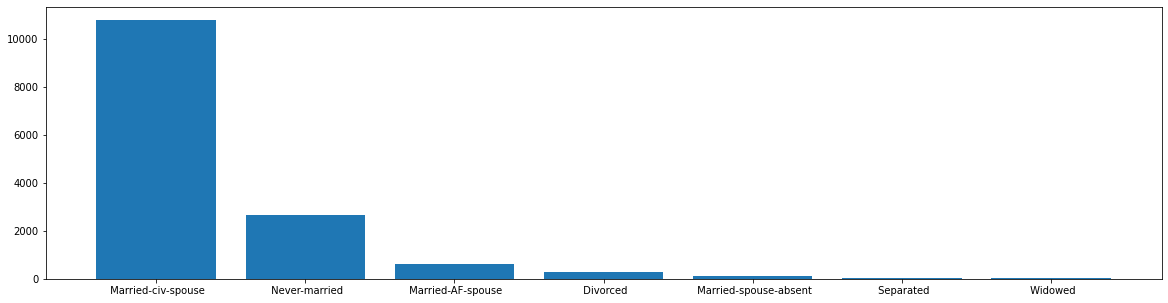

In [16]:
plt.figure(figsize=(20,5))
mask = df[df.age<30]
plt.bar(mask["marital-status"].unique(),mask["marital-status"].value_counts()) 

<BarContainer object of 7 artists>

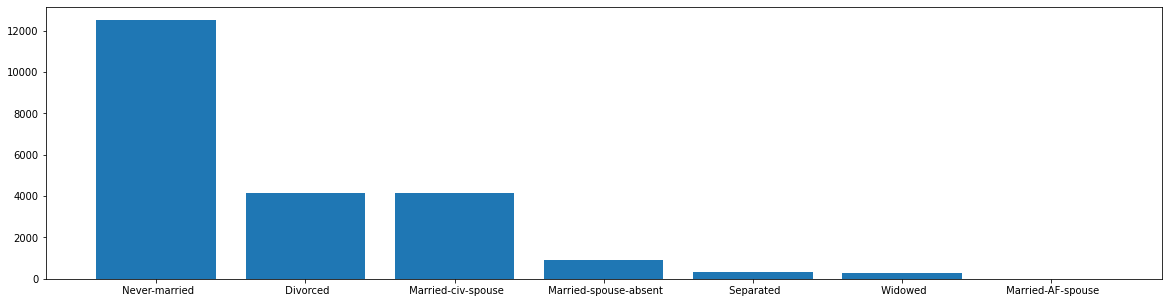

In [17]:
plt.figure(figsize=(20,5))
mask = df[(df.age>30) & (df.age<50)]
plt.bar(mask["marital-status"].unique(),mask["marital-status"].value_counts()) 

<BarContainer object of 7 artists>

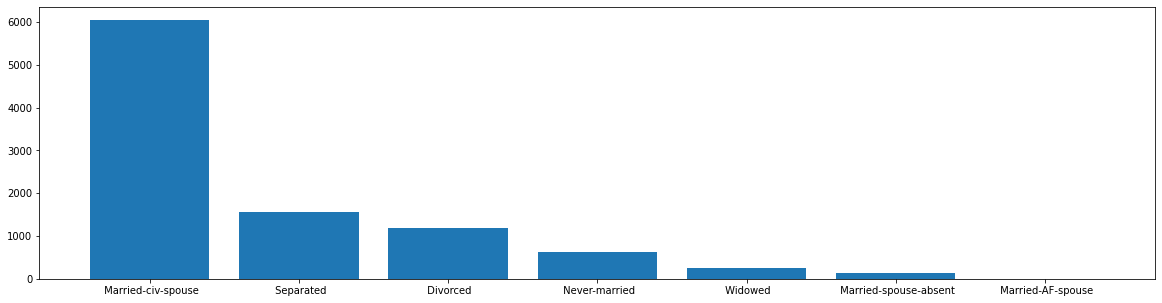

In [18]:
plt.figure(figsize=(20,5))
mask = df[(df.age>50)]
plt.bar(mask["marital-status"].unique(),mask["marital-status"].value_counts()) 

People above 50 is more likely to be married or separated while people below 50 tends to be never married or divorced.Let's check which ages tends to be never married more.

####Relationship

<BarContainer object of 6 artists>

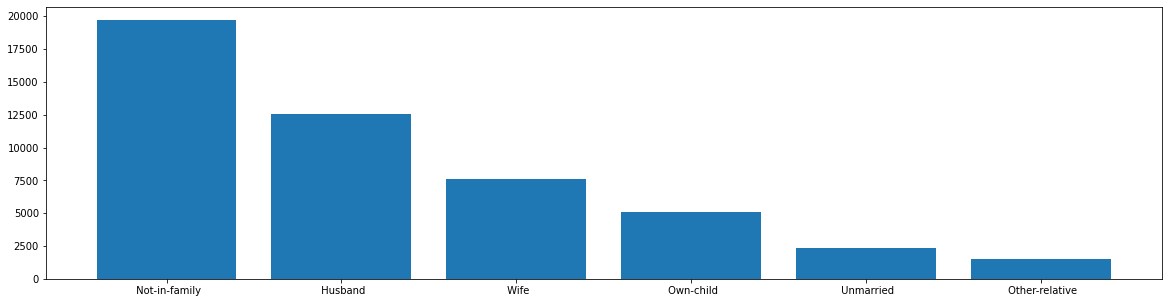

In [19]:
plt.figure(figsize=(20,5))
plt.bar(df.relationship.unique(),df.relationship.value_counts())     

####Race

<BarContainer object of 5 artists>

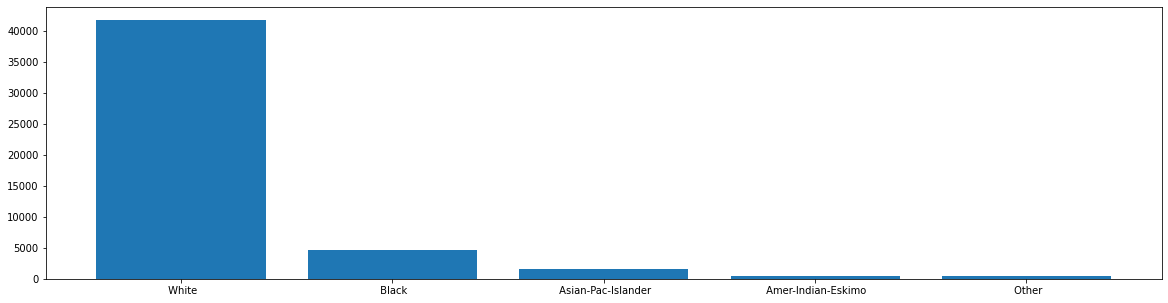

In [20]:
plt.figure(figsize=(20,5))
plt.bar(df.race.unique(),df.race.value_counts())     

Race class is imbalanced,most of the instances are white followed by black having a large difference.

<BarContainer object of 2 artists>

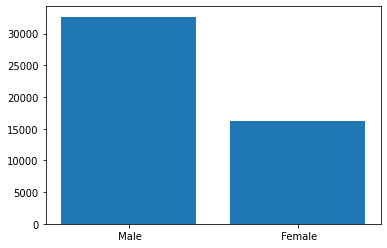

In [21]:
plt.bar(df.sex.unique(),df.sex.value_counts())     

<BarContainer object of 2 artists>

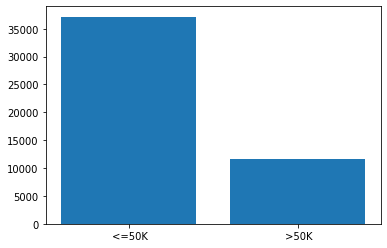

In [22]:
plt.bar(df["<=50K"].unique(),df["<=50K"].value_counts())     

<BarContainer object of 2 artists>

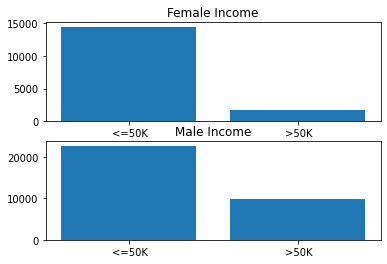

In [23]:
fig,axs = plt.subplots(2)
mask=df[df["sex"]==" Female"]
axs[0].set_title("Female Income")
axs[0].bar(mask["<=50K"].unique(),mask["<=50K"].value_counts())
mask=df[df["sex"]==" Male"]     
axs[1].set_title("Male Income")
axs[1].bar(mask["<=50K"].unique(),mask["<=50K"].value_counts())

<BarContainer object of 16 artists>

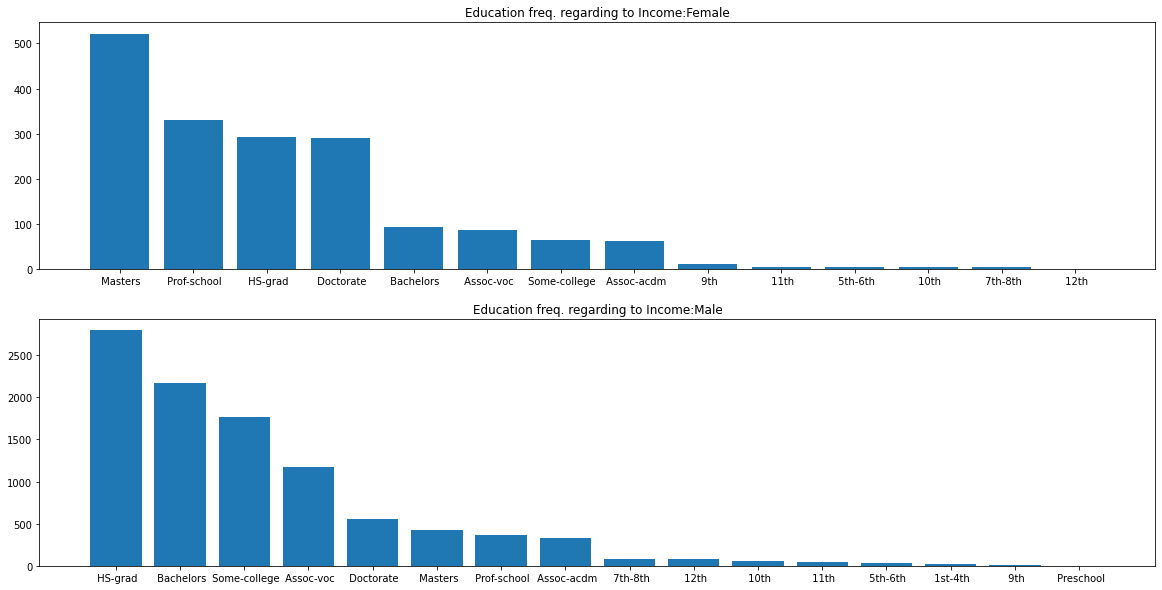

In [24]:
mask = df[(df["<=50K"]==" >50K") & (df["sex"]==" Female")]
fig,axs = plt.subplots(2,figsize=(20,10))
mask.head()
axs[0].set_title("Education freq. regarding to Income:Female")
axs[0].bar(mask.education.unique(),mask.education.value_counts())
mask = df[(df["<=50K"]==" >50K") & (df["sex"]==" Male")]
axs[1].set_title("Education freq. regarding to Income:Male")
axs[1].bar(mask.education.unique(),mask.education.value_counts())

<BarContainer object of 68 artists>

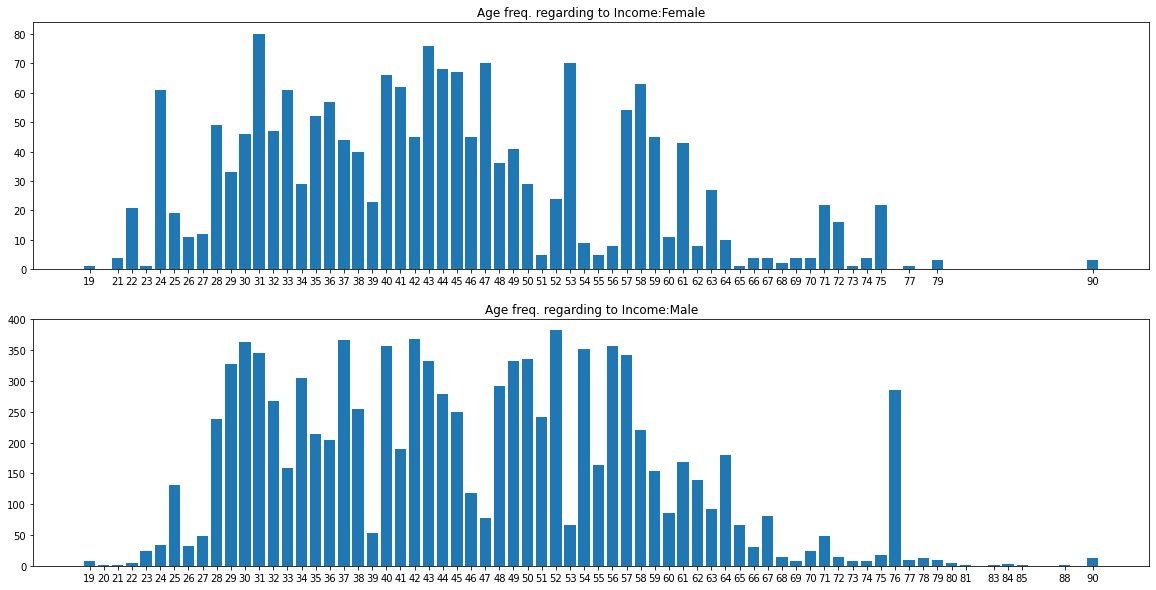

In [25]:
mask = df[(df["<=50K"]==" >50K") & (df["sex"]==" Female")]
fig,axs = plt.subplots(2,figsize=(20,10))
mask.head()
axs[0].set_xticks(mask.age.unique())
axs[0].set_title("Age freq. regarding to Income:Female")
axs[0].bar(mask.age.unique(),mask.age.value_counts())

mask = df[(df["<=50K"]==" >50K") & (df["sex"]==" Male")]
axs[1].set_xticks(mask.age.unique())
axs[1].set_title("Age freq. regarding to Income:Male")
axs[1].bar(mask.age.unique(),mask.age.value_counts())


###Pre-Processing & Encoding

There were lots of missing values exists in the dataset.After certain operations we have seen that almost any imputation method results same as dropping the missing values.

In [26]:
df_temp = df.dropna()

Let's check for the NaN after the drop method just to be sure.

In [27]:
for element in df_temp.isnull().sum():
  if(element==True):
      print("NaN found..")

Now we are going to label some columns as categorical in order to encode easier.

In [28]:
df_temp["sex"] = df_temp["sex"].astype('category')
df_temp["workclass"] = df_temp["workclass"].astype('category')
df_temp["marital-status"] = df_temp["marital-status"].astype('category')
df_temp["occupation"] = df_temp["occupation"].astype('category')
df_temp["race"] = df_temp["race"].astype('category')
df_temp["relationship"] = df_temp["relationship"].astype('category')
df_temp["native-country"] = df_temp["native-country"].astype('category')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

We separate the data to features and target data.Finally we are One-Hot Encoding several categorical classes.

In [29]:
target = df_temp["<=50K"]
df_temp = df_temp.drop(columns=['<=50K'])
df_temp = pd.get_dummies(df_temp)

Let's see what have happened after One-Hot Encoding

In [30]:
df_temp.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we are going to label-encode several columns and split the encoded data to train and test data.

In [31]:
from sklearn.model_selection import train_test_split
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_temp = df_temp.apply(lambda x:d[x.name].fit_transform(x))
X_train, X_test, y_train, y_test = train_test_split(df_temp,target,test_size=0.33, random_state=42)

We still have some some data that needs to be scaled.Scaling allows most of the ML models to show better performance.In our case we are using ANN and we do not wan't any feature to show more affect than others.

In [32]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)

In [33]:
x_test = StandardScaler().fit_transform(X_test)

###Artificial Neural Network

In [34]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(104,)))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dense(16, activation='swish'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [35]:
dfcurr=pd.DataFrame(X_train)
for col in dfcurr.columns:
  dfcurr[col]=dfcurr[col].astype(int)

In [36]:
y_train = np.ravel(y_train)

In [37]:
coder = LabelEncoder().fit_transform(y_train)

In [38]:
print(coder)

[0 0 0 ... 0 1 0]


In [39]:
model.fit(X_train,coder,epochs=25,batch_size=1,verbose=1)

Epoch 1/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3509 - accuracy: 0.8366
Epoch 2/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3311 - accuracy: 0.8468
Epoch 3/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3257 - accuracy: 0.8487
Epoch 4/25
30298/30298 [==============================] - 33s 1ms/step - loss: 0.3223 - accuracy: 0.8509
Epoch 5/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3210 - accuracy: 0.8523
Epoch 6/25
30298/30298 [==============================] - 33s 1ms/step - loss: 0.3194 - accuracy: 0.8534
Epoch 7/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3173 - accuracy: 0.8558
Epoch 8/25
30298/30298 [==============================] - 34s 1ms/step - loss: 0.3157 - accuracy: 0.8555
Epoch 9/25
30298/30298 [==============================] - 33s 1ms/step - loss: 0.3135 - accuracy: 0.8571
Epoch 10/25
30298/30298 [==============================

In [40]:
y_test = np.ravel(y_test)

In [41]:
score = model.evaluate(x_test,LabelEncoder().fit_transform(y_test))

467/467 [==============================] - 0s 909us/step - loss: 0.3281 - accuracy: 0.8531


In [42]:
y_true,y_pred = LabelEncoder().fit_transform(y_test),model.predict(x_test).round()
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     11216
           1       0.77      0.58      0.66      3708

    accuracy                           0.85     14924
   macro avg       0.82      0.76      0.79     14924
weighted avg       0.85      0.85      0.85     14924



Model works good when it tries to identify <=50K which is an expected result since that class is oversampled than the second class.The model also shows a good precision on second class but fails to show a good recall.